In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

MARKERS = ['+', 'x', '.']
COLORS = ['red', 'green', 'blue']

def plot_points(xy, labels):
    
    for i, label in enumerate(set(labels)):
        points = np.array([xy[j,:] for j in range(len(xy)) if labels[j] == label])
        marker = MARKERS[i % len(MARKERS)]
        color = COLORS[i % len(COLORS)]
        plt.scatter(points[:,0], points[:,1], marker=marker, color=color)
        
def plot_boundary(X, pred):
    
    x_min, x_max = X[:,0].min() - .1, X[:,0].max() + .1
    y_min, y_max = X[:,1].min() - .1, X[:,1].max() + .1
    
    xs, ys = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    xys = np.column_stack([xs.ravel(), ys.ravel()])
    zs = pred(xys).reshape(xs.shape)

    plt.contour(xs, ys, zs, colors='black')

In [26]:
import numpy as np
import sklearn
import sklearn.datasets
from sklearn.preprocessing import label_binarize

X, y = sklearn.datasets.make_moons(200, noise=0.20)

n_examples = len(X)
n_features = 2
n_labels = 2
alpha = 0.01
lambda_ = 0.01

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    yy = label_binarize([i + 1 for i in y], [1, 2, 3])[:,0:2]

    z1 = X.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    a2 = sigmoid(z2)

    err = (-yy) * np.log(a2) - (1 - yy) * np.log(1 - a2)
    cost = np.sum(err) / n_examples

    return cost

def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']

    z1 = x.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    a2 = sigmoid(z2)

    return np.argmax(a2, axis=1)

class Network(object):
    
    def __init__(self, n_features, n_hidden, n_labels):
        self.weights = [
            #np.random.randn
        ]

def train(nn_hdim, num_passes=20000, print_loss=False):

    np.random.seed(0)
    W1 = np.random.randn(n_features, nn_hdim)# / np.sqrt(n_features)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, n_labels)# / np.sqrt(nn_hdim)
    b2 = np.zeros((1, n_labels))

    model = {}

    for i in range(0, num_passes):

        z1 = X.dot(W1) + b1
        a1 = sigmoid(z1)
        z2 = a1.dot(W2) + b2
        probs = sigmoid(z2)

        delta3 = probs
        delta3[range(n_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * sigmoid_prime(z1)#(1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        dW2 += lambda_ * W2
        dW1 += lambda_ * W1

        W1 += -alpha * dW1
        b1 += -alpha * db1
        W2 += -alpha * dW2
        b2 += -alpha * db2

        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

        if print_loss and i % 1000 == 0:
          print("Iteration %i: %f" %(i, calculate_loss(model)))

    return model

model = train(6, print_loss=True)
r = predict(model, X)

from sklearn.metrics import accuracy_score
print(accuracy_score(y, predict(model, X)))

Iteration 0: 1.160269
Iteration 1000: 0.136418
Iteration 2000: 0.107689
Iteration 3000: 0.093457
Iteration 4000: 0.083836
Iteration 5000: 0.077692
Iteration 6000: 0.073836
Iteration 7000: 0.071343
Iteration 8000: 0.069668
Iteration 9000: 0.068501
Iteration 10000: 0.067663
Iteration 11000: 0.067044
Iteration 12000: 0.066573
Iteration 13000: 0.066207
Iteration 14000: 0.065916
Iteration 15000: 0.065679
Iteration 16000: 0.065484
Iteration 17000: 0.065319
Iteration 18000: 0.065179
Iteration 19000: 0.065059
0.985


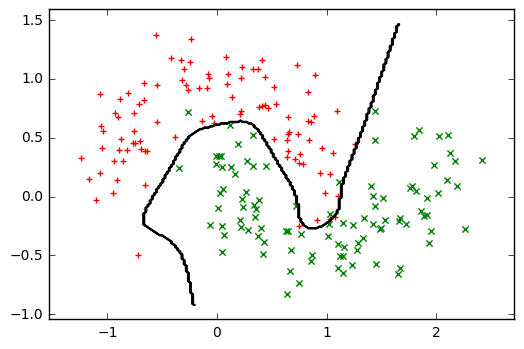

In [24]:
plot_points(X, y)
plot_boundary(X, lambda x: predict(model, x))